In [188]:
import numpy as np 
import matplotlib.pyplot as plt

mu, sigma = 0,2# mean and standard deviation
gauss_noise = np.random.normal(mu, sigma, [200,14])
gauss_high = np.random.normal(mu, sigma, [200,1000])

In [189]:
gauss_noise.shape, gauss_high.shape

((200, 14), (200, 1000))

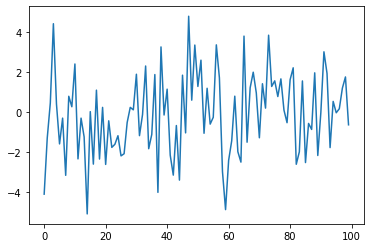

In [190]:
plt.plot(gauss_noise[0:100, 0:1])

In [191]:
#Creation of synthetic data using make blobs
#Parameter - set number of samples = 200, features(dimensions) = 4, number of classes = 2, number of clusters = 2
samps = 200
feats = 4
from sklearn.datasets import make_blobs
Input_data = make_blobs(n_samples=samps, n_features=feats, centers=2, cluster_std=1.1, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1)

In [192]:
#Store the input data and the associated labels to a variable
X = Input_data[0]
Y = Input_data[1]

In [193]:
X.shape, Y.shape

((200, 4), (200,))

In [194]:
#import all the packages

from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
#Create a pandas data frame for the input data 
#We need to center this data to perform MDS 
X -= X.mean()
X_df = pd.DataFrame(X, columns=['dim'+ str(i) for i in range(1,feats+1)])


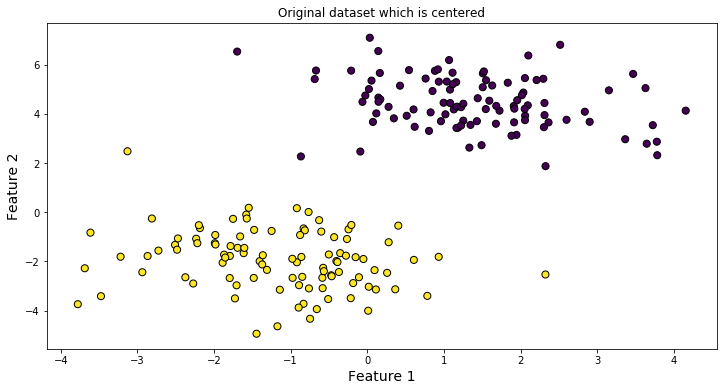

In [195]:
#Plot of the input data 
plt.figure(figsize=(12,6))   #initialise the size of the fig
#Plot the first two dimensions

plt.scatter(X_df['dim1'], X_df['dim2'], s=50, c=Y, edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset which is centered")
plt.show()

In [117]:
#center the noise 
gauss_noise -= gauss_noise.mean()
gauss_high -=gauss_high.mean() #for 1000 dims

In [197]:
gauss_noise.shape, gauss_high.shape

((200, 14), (200, 1000))

In [198]:
#Add the gaussian noise to the original data 
noise_data = X + gauss_noise[:,0:4]
high_data = X + gauss_high[:, 0:4]

In [199]:
noise_data.shape, high_data.shape

((200, 4), (200, 4))

In [200]:
noise_data = np.concatenate((noise_data, gauss_noise[:,4:14]), axis=1)
high_data = np.concatenate((high_data, gauss_high[:,4:1000]), axis=1)

In [201]:
noise_data.shape, high_data.shape

((200, 14), (200, 1000))

In [203]:
#make this into a pandas dataframe 
feat_noise = noise_data.shape[1]
ft_n = high_data.shape[1]
noise_df = pd.DataFrame(noise_data, columns=['dim'+ str(i) for i in range(1,feat_noise+1)])
high_df = pd.DataFrame(high_data, columns=['dim'+ str(i) for i in range(1,ft_n+1)])


In [204]:
noise_df.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,dim11,dim12,dim13,dim14
0,-1.791244,-0.004713,-1.896120,-0.784654,-1.504336,-0.753043,-0.008776,-0.088683,-2.592684,-0.095020,1.056318,1.073827,0.834778,1.846251
1,0.413117,4.289379,-1.162730,-2.111325,0.215488,-3.160123,-1.414049,-0.077286,-0.128736,0.651861,-1.615421,-3.860977,1.735559,-2.002935
2,1.458778,5.390819,-5.018290,0.855437,-2.189029,-2.139788,-2.720397,-4.249138,-0.908514,-0.084360,1.285178,-1.465714,-1.849074,1.293709
3,5.583812,5.068885,-4.315861,-1.133712,0.300932,-0.764870,-3.969084,-2.280173,0.382714,1.230558,0.180740,-2.841589,-2.592543,-1.472497
4,0.553101,2.102431,-3.827109,-1.715200,-3.171816,1.250667,0.044578,-0.648762,-2.795760,-2.757160,1.543624,-1.183571,-2.794392,-2.223684


In [205]:
high_df.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim991,dim992,dim993,dim994,dim995,dim996,dim997,dim998,dim999,dim1000
0,1.227011,1.566513,-4.181920,-5.127754,-1.851862,-0.719733,1.392375,-3.693185,-0.923728,2.350984,...,3.136550,-1.471226,-3.245489,-0.974963,-2.747193,0.109859,-4.956873,0.648350,-2.901891,0.746090
1,-0.057442,6.216596,-3.818736,-0.032290,-2.224110,-2.041691,0.184002,-1.724302,1.814667,-1.299954,...,-2.979745,1.646250,0.318503,-2.776471,-2.920054,-0.139507,2.973977,-0.862514,-0.012819,2.218695
2,0.586482,4.363340,-4.816747,1.112356,0.911943,-0.365808,0.119543,1.281147,0.773234,0.275825,...,-1.496308,0.221447,1.697766,-0.601976,-1.316381,-2.931994,-1.499226,-1.303341,-0.862481,0.947094
3,4.948942,2.979063,-3.599498,-1.212344,0.894673,-0.726426,-1.497782,2.134276,2.122240,0.760183,...,-1.389578,2.366389,0.809184,0.942940,-0.267014,-4.492972,1.891340,-1.283844,-1.716230,5.836792
4,1.980122,9.143107,0.186644,-1.278035,0.513400,-2.205560,-0.090894,-1.226444,0.659099,2.116059,...,-2.920882,1.687940,-3.168503,-0.353629,-1.576136,2.315584,4.954718,-2.645266,1.345159,-0.672928


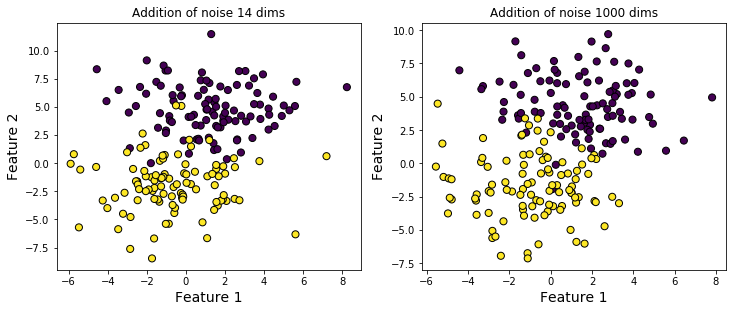

In [206]:
#Plot of the input data 
plt.figure(figsize=(12,10))   #initialise the size of the fig
#Plot the first two dimensions
plt.subplot(2,2,1)
plt.scatter(noise_df['dim1'], noise_df['dim2'], s=50, c=Y, edgecolors='black')
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Addition of noise 14 dims")

plt.subplot(2,2,2)
plt.scatter(high_df['dim1'], high_df['dim2'], s=50, c=Y, edgecolors='black')
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Addition of noise 1000 dims")
plt.show()

In [207]:
from sklearn.ensemble import RandomForestClassifier
#Function to create a proximity matrix
#I/p params : The model we're using of RF, the input data that the model is being applied to 

#That is, for all pairs of samples in your dataset, 
#iterate over the decision trees in the forest and count the number of times they fall in the same leaf 
#i.e., the number of times 'apply' gives the same node id for both samples in the pair.

#LINK FOR GENERATING THE PROXIMITY MATRIX:-
#https://stackoverflow.com/questions/18703136/proximity-matrix-in-sklearn-ensemble-randomforestclassifier

def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat   


In [210]:
#Define a random forest classfier model
print("input data size for lower dim\t", noise_data.shape)
model_rf = RandomForestClassifier(n_estimators=100, random_state=1, max_features = 'sqrt')
model_rf.fit(noise_data, Y)
#Calling the proximity matrix function to obtain the proximity matrix from the RF model.

prox_mat = proximityMatrix(model_rf, noise_data, normalize=True)

input data size for lower dim	 (200, 14)


In [211]:
#Define a random forest classfier model
print("input data size for higher dim\t", high_data.shape)
model_rf_hi = RandomForestClassifier(n_estimators=100, random_state=1, max_features = 'sqrt')
model_rf_hi.fit(high_data, Y)
#Calling the proximity matrix function to obtain the proximity matrix from the RF model.

prox_mat_hi = proximityMatrix(model_rf_hi, high_data, normalize=True)
print("prox mat size \t", prox_mat_hi.shape)

input data size for higher dim	 (200, 1000)
prox mat size 	 (200, 200)


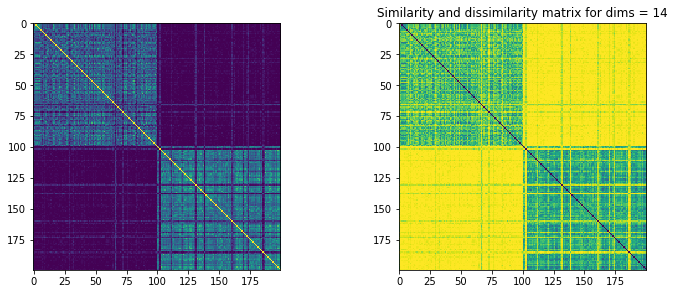

In [212]:
#Display the proximity matrix 
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
plt.imshow(prox_mat)
plt.subplot(2,2,2)
dis_mat = 1 - prox_mat  #Creating a dissimilarity matrix
plt.title("Similarity and dissimilarity matrix for dims = 14")
plt.imshow(dis_mat)
dis_mat.shape
plt.show()

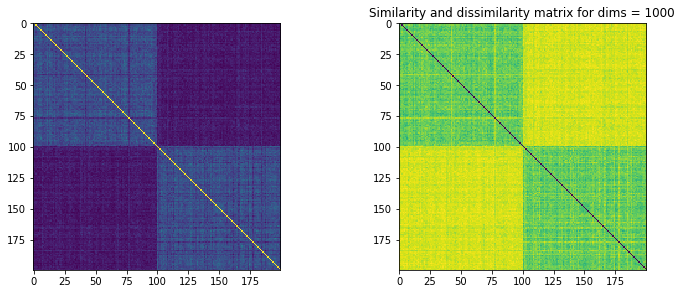

In [213]:
#Display the proximity matrix 
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
plt.imshow(prox_mat_hi)
plt.subplot(2,2,2)
dis_mat_hi = 1 - prox_mat_hi  #Creating a dissimilarity matrix
plt.title("Similarity and dissimilarity matrix for dims = 1000")
plt.imshow(dis_mat_hi)
dis_mat_hi.shape
plt.show()

In [215]:
#Performing clustering on the output of the RF to check its efficiency without MDS

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(prox_mat) 
predict = cluster.fit_predict(prox_mat_hi)

score = adjusted_rand_score(Y, predict_labels)
score_hi = adjusted_rand_score(Y, predict)
#print("labels\n", Y) #True labels
#print("predict\n", predict_labels) #Labels that were predicted
print("Adjusted Rand Score low and high:", score, score_hi) #Adjusted rand score to check how well the clusters are identified.

Adjusted Rand Score low and high: 0.8272388856819494 1.0


In [216]:
#Clustering for non-euclidean 
clust1 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="single")
clust2 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="complete")
clust3 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="average")

pred_labels1 = clust1.fit_predict(dis_mat) 
pred_labels2 = clust2.fit_predict(dis_mat) 
pred_labels3 = clust3.fit_predict(dis_mat)

pred_labels1_hi = clust1.fit_predict(dis_mat_hi) 
pred_labels2_hi = clust2.fit_predict(dis_mat_hi) 
pred_labels3_hi = clust3.fit_predict(dis_mat_hi)

score_1 = adjusted_rand_score(Y, pred_labels1)
score_2 = adjusted_rand_score(Y, pred_labels2)
score_3 = adjusted_rand_score(Y, pred_labels3)

score_1_hi = adjusted_rand_score(Y, pred_labels1_hi)
score_2_hi = adjusted_rand_score(Y, pred_labels2_hi)
score_3_hi = adjusted_rand_score(Y, pred_labels3_hi)


print("Adjusted Rand Score for 14 dims:", score_1, score_2, score_3) #Adjusted rand score to check how well the clusters are identified.
print("Adjusted Rand Score for 1000 dims:", score_1_hi, score_2_hi, score_3_hi)

Adjusted Rand Score for 14 dims: 0.0 0.7910551708568828 0.9020076252486741
Adjusted Rand Score for 1000 dims: 1.0 1.0 1.0


In [217]:
from sklearn.manifold import MDS
val = [10, 8, 6, 4, 2] 
mds_models = []
for i in val: 
    mds_models.append( MDS(n_components=i, metric = True, dissimilarity='precomputed', random_state=1))
print(mds_models)

[MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=10, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=8, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=6, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=4, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=1, verbose=0)]


In [218]:
embed1 = mds_models[0].fit_transform(dis_mat)
embed2 = mds_models[1].fit_transform(dis_mat)
embed3 = mds_models[2].fit_transform(dis_mat)
embed4 = mds_models[3].fit_transform(dis_mat)
embed5 = mds_models[4].fit_transform(dis_mat)  

embed_hi_4 = mds_models[3].fit_transform(dis_mat_hi) #reducing from 1000 -> 4 dims
embed_hi_2 = mds_models[4].fit_transform(dis_mat_hi) #reducing from 1000 -> 2 dims

print("Shape of MDS projections after reducing dimensions\n")
print(embed1.shape)
print(embed2.shape)
print(embed3.shape)
print(embed4.shape)
print(embed5.shape)
print("For high dimensional data\n")
print(embed_hi_4.shape)
print(embed_hi_2.shape)

    

Shape of MDS projections after reducing dimensions

(200, 10)
(200, 8)
(200, 6)
(200, 4)
(200, 2)
For high dimensional data

(200, 4)
(200, 2)


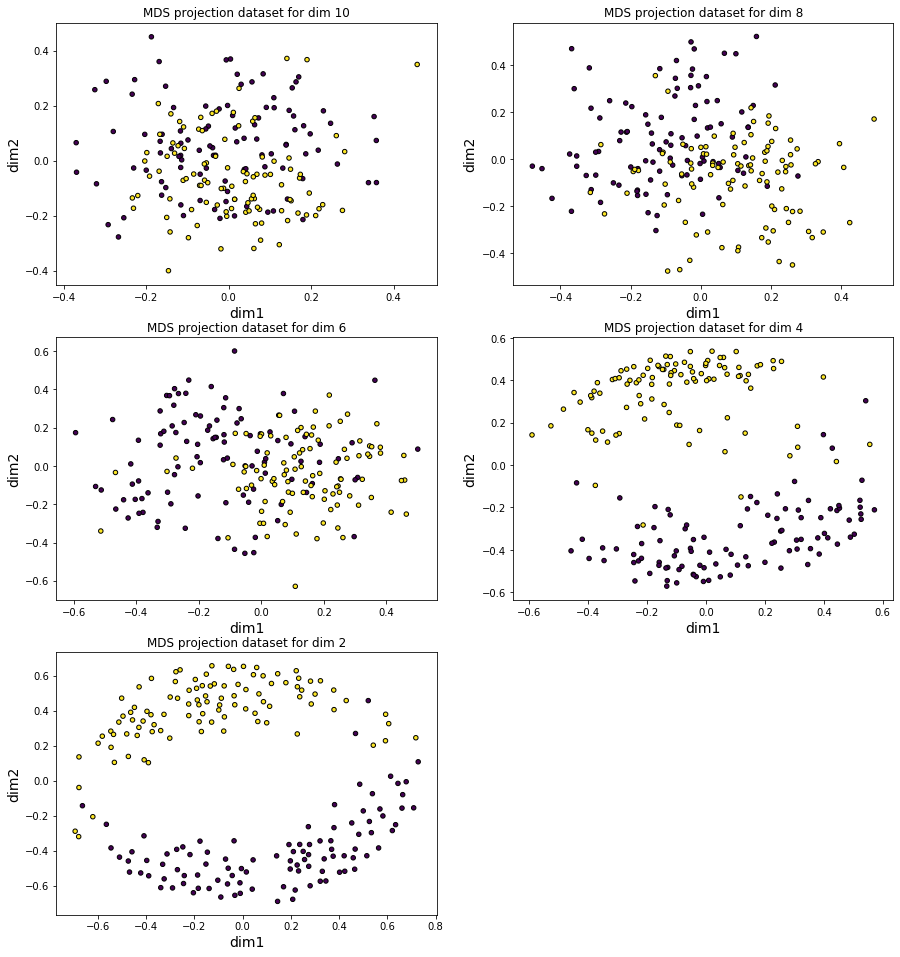

In [219]:
#Scatter plot to show the MDS projection of the reduced dimensions
plt.figure(figsize=(15,28))
plt.subplot(5,2,1)
plt.scatter(embed1[:, 0], embed1[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 10")

plt.subplot(5,2,2)
plt.scatter(embed2[:, 0], embed2[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 8")

plt.subplot(5,2,3)
plt.scatter(embed3[:, 0], embed3[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 6")

plt.subplot(5,2,4)
plt.scatter(embed4[:, 0], embed4[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 4")

plt.subplot(5,2,5)
plt.scatter(embed5[:, 0], embed5[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 2")
plt.show()

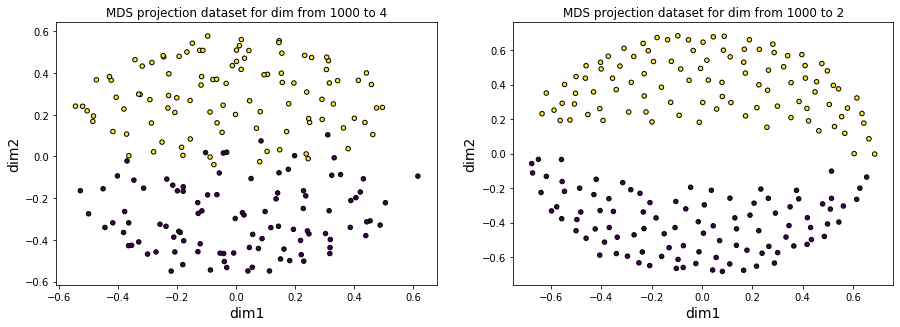

In [166]:
#Scatter plot to show the MDS projection of the reduced dimensions for the high dimensional noise data
plt.figure(figsize=(15,28))
plt.subplot(5,2,1)
plt.scatter(embed_hi_4[:, 0], embed_hi_4[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim from 1000 to 4")

plt.subplot(5,2,2)
plt.scatter(embed_hi_2[:, 0], embed_hi_2[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim from 1000 to 2")


plt.show()

In [220]:
#Perform clusterning on this output to check ARI

#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

clust_rf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_rf1 = clust_rf.fit_predict(embed1)
predict_rf2 = clust_rf.fit_predict(embed2)
predict_rf3 = clust_rf.fit_predict(embed3)
predict_rf4 = clust_rf.fit_predict(embed4)
predict_rf5 = clust_rf.fit_predict(embed5)

predict_rf_hi4 = clust_rf.fit_predict(embed_hi_4)
predict_rf_hi2 = clust_rf.fit_predict(embed_hi_2)

score_rf1 = adjusted_rand_score(Y, predict_rf1)
score_rf2 = adjusted_rand_score(Y, predict_rf2)
score_rf3 = adjusted_rand_score(Y, predict_rf3)
score_rf4 = adjusted_rand_score(Y, predict_rf4)
score_rf5 = adjusted_rand_score(Y, predict_rf5)

score_rf_hi4 = adjusted_rand_score(Y, predict_rf_hi4)
score_rf_hi2 = adjusted_rand_score(Y, predict_rf_hi2)

#print("labels\n", Y)
#print("predict\n", predict_rf)
print("Adjusted Rand Score for lower dim nosie:", score_rf1,score_rf2, score_rf3, score_rf4, score_rf5)
print("Adjusted Rand Score for higher dim nosie:", score_rf_hi4, score_rf_hi2)

Adjusted Rand Score for lower dim nosie: 0.8090438759699319 0.864221036954136 0.9020088130200377 0.845627049205166 0.9020088130200377
Adjusted Rand Score for higher dim nosie: 0.9799995050507551 0.9799995050507551


In [234]:
print(noise_data.shape), print(high_data.shape)

(200, 14)
(200, 1000)


(None, None)

In [235]:
from rerf.urerf import UnsupervisedRandomForest
#Define the USPORF model
clf = UnsupervisedRandomForest(projection_matrix="RerF", max_features = 'auto',random_state=1)
#Fit this model to the input data 
clf.fit(noise_data)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=1)

In [239]:
clf2 = clf.fit(high_data)
print(high_data.shape)

(200, 1000)


In [248]:
clf3 = clf.fit(X)

In [249]:
print("original data without noise dims \t", X.shape)
orig_sim = clf3.transform()

original data without noise dims 	 (200, 4)


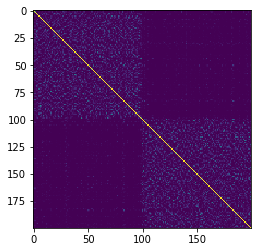

In [250]:
plt.imshow(orig_sim)

In [251]:
clust= AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
pred = cluster.fit_predict(orig_sim)
sc = adjusted_rand_score(Y, pred)

print("labels\n", Y)
print("predict\n", pred)
print("Adjusted Rand Score:", sc)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Adjusted Rand Score: 0.8830142482257899


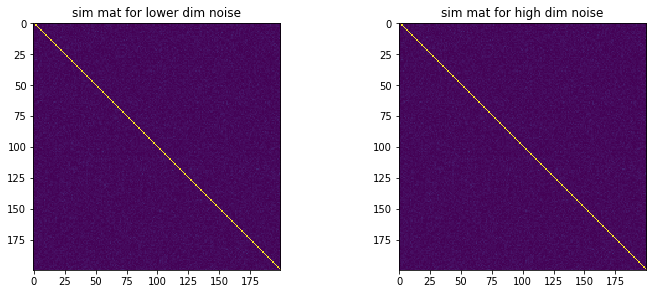

In [224]:
#Store the ouput of USPORF which is a similarity matrix and plot 
plt.figure(figsize= (12,10))
sim_mat1 = clf.transform()
plt.subplot(2,2,1)
plt.imshow(sim_mat1)
plt.title('sim mat for lower dim noise')
plt.subplot(2,2,2)
sim_mat2 = clf2.transform()
plt.imshow(sim_mat2)
plt.title('sim mat for high dim noise')
plt.show()

In [252]:
pred1 = clust.fit_predict(sim_mat1)
pred2 = clust.fit_predict(sim_mat2)
sc1 = adjusted_rand_score(Y, pred1)
sc2 = adjusted_rand_score(Y, pred2)

print("labels\n", Y)
print("predict\n", pred1)
print("predict2\n", pred2)
print("Adjusted Rand Score:", sc1,sc2)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1]
predict2
 [0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 0 0 0 1 

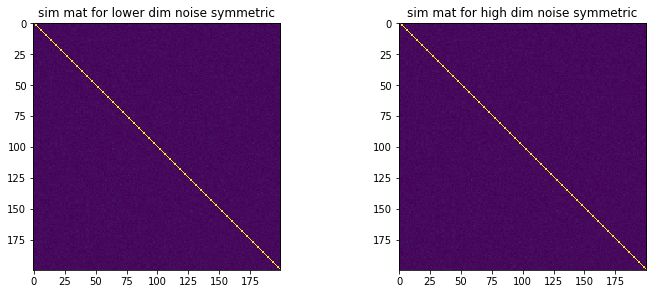

In [177]:
#According to the previous run experiments, we found that the similarity matrix isn't truely symmetric 
#Utilize the grapsy function to make it symmetric 
def symmetrize(graph, method="avg"):

    if method == "triu":
        graph = np.triu(graph)
    elif method == "tril":
        graph = np.tril(graph)
    elif method == "avg":
        graph = (np.triu(graph) + np.tril(graph)) / 2
    else:
        msg = "You have not passed a valid parameter for the method."
        raise ValueError(msg)
    # A = A + A' - diag(A)
    graph = graph + graph.T - np.diag(np.diag(graph))
    return graph

#New similarity matrix after making it symmetric
new_sim = symmetrize(sim_mat1)
new_sim2 = symmetrize(sim_mat2)
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
plt.imshow(new_sim)
plt.title('sim mat for lower dim noise symmetric')
plt.subplot(2,2,2)
plt.imshow(new_sim2)
plt.title('sim mat for high dim noise symmetric')
plt.show()

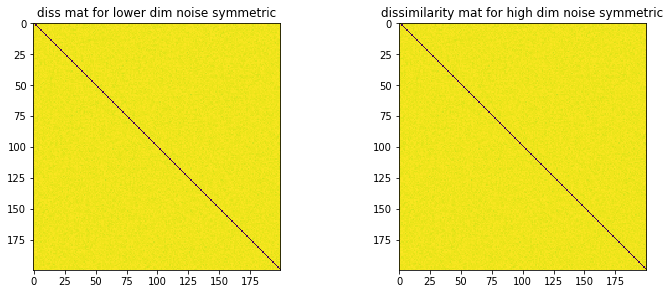

In [253]:
#Create a dissimilarity matrix by 1-new_sim
dis_mat_usporf = 1 - new_sim
dis_mat_usporf2 = 1 - new_sim2
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
plt.imshow(dis_mat_usporf)
plt.title('diss mat for lower dim noise symmetric')

plt.subplot(2,2,2)
plt.imshow(dis_mat_usporf2)
plt.title('dissimilarity mat for high dim noise symmetric')
plt.show()



In [254]:
mds_usporf_models = []
for i in val: 
    mds_usporf_models.append( MDS(n_components=i, metric = True, dissimilarity='precomputed', random_state=1))
print(mds_usporf_models)

[MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=10, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=8, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=6, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=4, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=1, verbose=0)]


In [258]:
embed1_usporf = mds_usporf_models[0].fit_transform(dis_mat_usporf)
embed2_usporf = mds_usporf_models[1].fit_transform(dis_mat_usporf)
embed3_usporf = mds_usporf_models[2].fit_transform(dis_mat_usporf)
embed4_usporf = mds_usporf_models[3].fit_transform(dis_mat_usporf)
embed5_usporf = mds_usporf_models[4].fit_transform(dis_mat_usporf)  

embed_usporf_hi4 = mds_usporf_models[3].fit_transform(dis_mat_usporf2)
embed_usporf_hi2 = mds_usporf_models[4].fit_transform(dis_mat_usporf2)


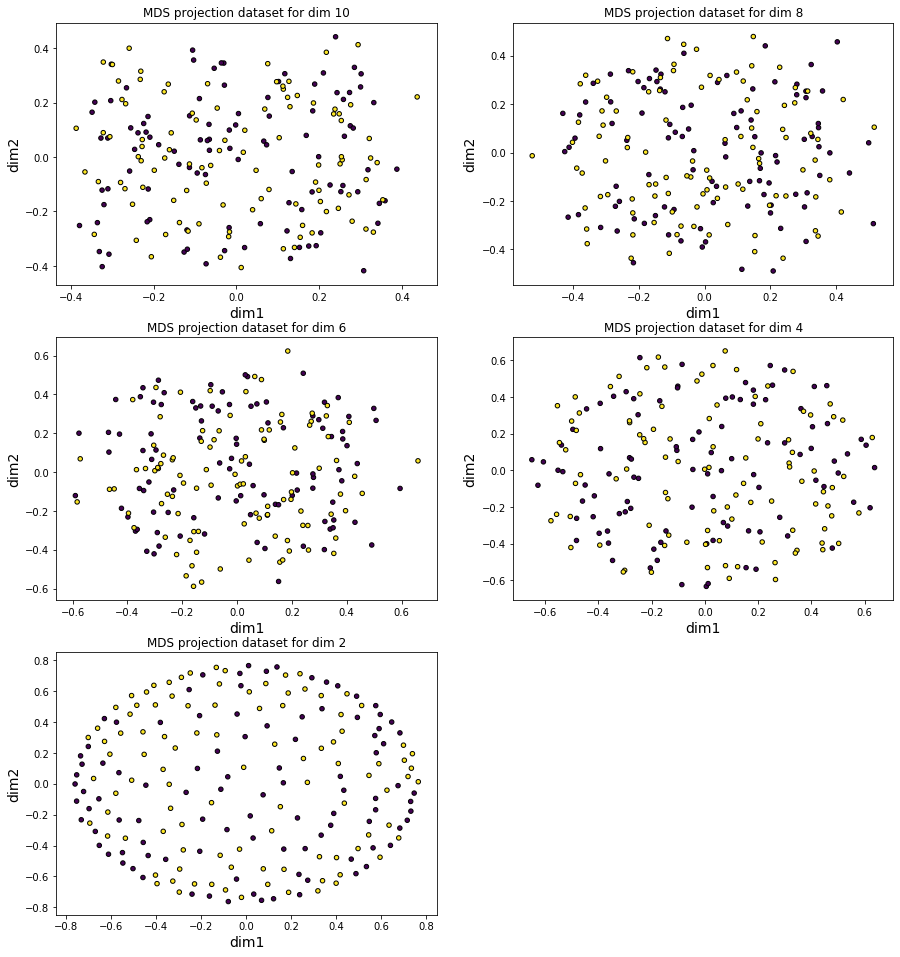

In [259]:
#Scatter plot to show the MDS projection of the reduced dimensions
plt.figure(figsize=(15,28))
plt.subplot(5,2,1)
plt.scatter(embed1_usporf[:, 0], embed1_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 10")

plt.subplot(5,2,2)
plt.scatter(embed2_usporf[:, 0], embed2_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 8")

plt.subplot(5,2,3)
plt.scatter(embed3_usporf[:, 0], embed3_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 6")

plt.subplot(5,2,4)
plt.scatter(embed4_usporf[:, 0], embed4_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 4")

plt.subplot(5,2,5)
plt.scatter(embed5_usporf[:, 0], embed5_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 2")
plt.show()

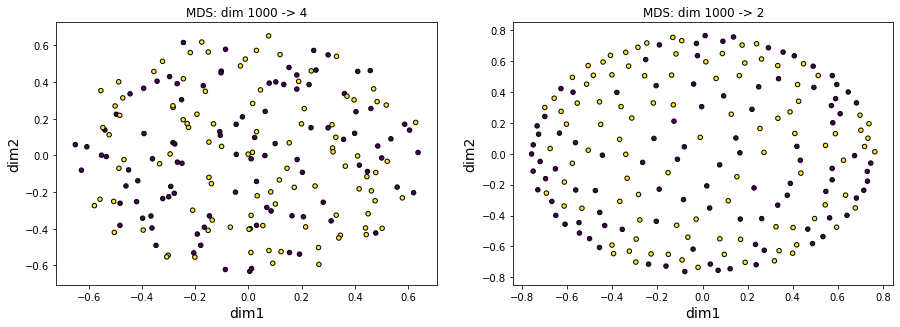

In [182]:
#Scatter plot to show the MDS projection of the reduced dimensions for 1000 dim data 
plt.figure(figsize=(15,28))
plt.subplot(5,2,1)
plt.scatter(embed_usporf_hi4[:, 0], embed_usporf_hi4[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS: dim 1000 -> 4")

plt.subplot(5,2,2)
plt.scatter(embed_usporf_hi2[:, 0], embed_usporf_hi2[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS: dim 1000 -> 2")
plt.show()


In [260]:
#Perform clusterning on this output to check ARI

#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

clust_usporf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_usporf1 = clust_rf.fit_predict(embed1_usporf)
predict_usporf2 = clust_rf.fit_predict(embed2_usporf)
predict_usporf3 = clust_rf.fit_predict(embed3_usporf)
predict_usporf4 = clust_rf.fit_predict(embed4_usporf)
predict_usporf5 = clust_rf.fit_predict(embed5_usporf)

predict_usporf_hi4 = clust_rf.fit_predict(embed_usporf_hi4)
predict_usporf_hi2 = clust_rf.fit_predict(embed_usporf_hi2)

score_usporf1 = adjusted_rand_score(Y, predict_usporf1)
score_usporf2 = adjusted_rand_score(Y, predict_usporf2)
score_usporf3 = adjusted_rand_score(Y, predict_usporf3)
score_usporf4 = adjusted_rand_score(Y, predict_usporf4)
score_usporf5 = adjusted_rand_score(Y, predict_usporf5)

score_usporf_hi4 = adjusted_rand_score(Y, predict_usporf_hi4)
score_usporf_hi2 = adjusted_rand_score(Y, predict_usporf_hi2)

#print("labels\n", Y)
#print("predict\n", predict_rf)
print("Adjusted Rand Score lower dim:", score_usporf1,score_usporf2, score_usporf3, score_usporf4, score_usporf5)
print("Adjusted Rand Score higher dim:", score_usporf_hi4, score_usporf_hi2)

Adjusted Rand Score lower dim: 0.02091811900525323 0.007291599864873149 -0.003045258847001912 -0.004518607695166706 0.00713517695774188
Adjusted Rand Score higher dim: -0.004518607695166706 0.00713517695774188
